<a href="https://colab.research.google.com/github/ABHISHEKKHOPADE/DEEP_LEARNING/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

loading of data and checking shape of training and vtesting data

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


a.shape         # Shape of array
a.ndim          # Number of dimensions
a.size          # Total number of elements
a.dtype         # Data type of elements
a.T             # Transpose
a.reshape()     # Change shape
a.flatten()     # Convert to 1D array
a.ravel()       # Similar to flatten, returns view
np.add(a, b)
np.subtract(a, b)
np.multiply(a, b)
np.divide(a, b)
np.power(a, 2)
np.exp(a)           # Exponential
np.log(a)           # Logarithm
np.sqrt(a)          # Square root
np.sum(a)
np.mean(a)
np.std(a)
np.var(a)
np.min(a)
np.max(a)
np.argmin(a)
np.argmax(a)
all these type of operation



In [3]:
x_train=x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test=x_test.reshape(-1,28,28,1).astype('float32')/255.0
print(x_train.shape)
print(x_test.shape)



(60000, 28, 28, 1)
(10000, 28, 28, 1)


x_train	The original training data, shape is usually (60000, 28, 28) for Fashion MNIST (60,000 grayscale images of 28×28 pixels)
.reshape()	NumPy method to change the shape of the array without changing its data
-1	This tells NumPy to automatically figure out the correct number for this dimension (it’ll be 60000 here)
28, 28	Height and width of each image
1	Number of channels — 1 means it's a grayscale image (like black-and-white); 3 would mean RGB image

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.1,horizontal_flip=False,height_shift_range=0.1)
test_datagen=ImageDataGenerator(rescale=1./255)
train_gen=train_datagen.flow(x_train,y_train,batch_size=32)
test_gen=test_datagen.flow(x_test,y_test,batch_size=32)

train_datagen	An instance of ImageDataGenerator, e.g.:
ImageDataGenerator(rescale=1./255, rotation_range=30, zoom_range=0.2, horizontal_flip=True)
.flow()	Converts raw NumPy arrays into a generator that yields batches
x_train	Input image data (after reshaping to (num_samples, 28, 28, 1))
y_train	Labels for classification
batch_size=32	Each batch contains 32 images and 32 labels
train_gen	Generator object for training; pass this into model.fit(

In [5]:
earlystop=EarlyStopping(monitor='val_accuracy',patience=5,verbose=1,mode='max',restore_best_weights=True)
model=Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,083,594 (4.13 MB)

 Trainable params: 1,082,314 (4.13 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_gen,epochs=30,validation_data=test_gen,callbacks=[earlystop])



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.6687 - loss: 0.9747 - val_accuracy: 0.7838 - val_loss: 0.6119
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8055 - loss: 0.5270 - val_accuracy: 0.8556 - val_loss: 0.3974
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8333 - loss: 0.4552 - val_accuracy: 0.8635 - val_loss: 0.3636
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8525 - loss: 0.4065 - val_accuracy: 0.8751 - val_loss: 0.3387
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8626 - loss: 0.3828 - val_accuracy: 0.8270 - val_loss: 0.4928
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8693 - loss: 0.3633 - val_accuracy: 0.8913 - val_loss: 0.2912
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8721 - loss: 0.3492 - val_accuracy: 0.8843 - val_loss: 0.3050
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8777 - loss: 0.33

NameError: name 'test_loss' is not defined

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4137 - loss: 188.1979

 Test accuracy: 0.4091


<Axes: >

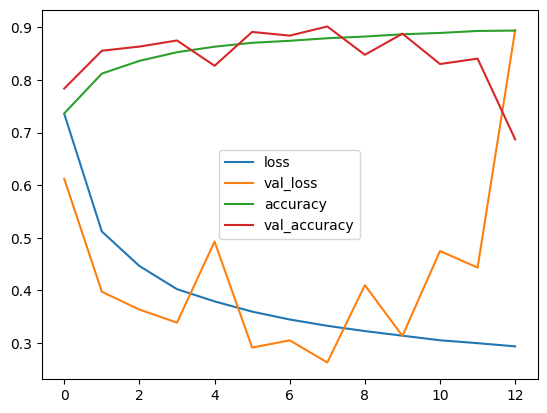

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n Test accuracy: {test_acc:.4f}")
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df[['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot()


In [9]:
# Get predictions
y_pred_probs = model.predict(x_test)  # Probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


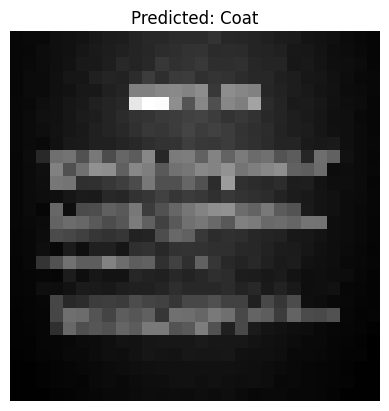

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image using OpenCV (grayscale)
img_path = "/content/download (1).jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Resize to 28x28 (Fashion MNIST size)
img_resized = cv2.resize(img, (28, 28))

# Normalize and reshape
img_normalized = img_resized.astype('float32') / 255.0
img_input = img_normalized.reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(img_input)
predicted_class = np.argmax(prediction, axis=1)[0]

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show image with prediction
plt.imshow(img_resized, cmap='gray')
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()
